In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D

## Singular Value Decomposition

##### SVD decomposes a matrix M (need not be square) into the following three matrices: $\;\;\;U, \;\; \Sigma, \;\; V^T$, 
##### *where U and V are orthogonal basis for column and row space of M, respectively, and $\Sigma$ is a diagonal matrix containing singular values of matrix M*
<br/>

##### $M_{m\;x\; n} = U_{m\;x\;m}\;.\; \Sigma_{m\;x\;n}\;.\; V^T_{n\;x\;n}$
<br/>

#####  Computing V:
######     $\;\;\;\;\;      M = U.\Sigma.V^T$
###### => $\;\;\;\;\;\;  M^T.M = (U.\Sigma.V^T)^T.U.\Sigma.V^T$   
###### =>$\;\;\;\;\;\;  M^T.M = V^{TT}.\Sigma^T.U^T.U.\Sigma.V^T\;\;\;\;\;\;$    ($\;M^T.M$ will be a symmetric matrix)
###### =>$\;\;\;\;\;\;  M^T.M = V.\Sigma^T.U^{-1}.U.\Sigma.V^T\;\;\;\;\;\;\;\;$  ($\;U^T = U^{-1}$, since U is an othogonal matrix)
###### =>$\;\;\;\;\;\;  M^T.M = V.\Sigma.I.\Sigma.V^T\;\;\;\;\;\;\;\;\;\;\;\;$   ($\; \Sigma^T = \Sigma$, since $\Sigma$ is a diagnol matrix)
###### =>$\;\;\;\;\;\;  M^T.M = V.\Sigma^2.V^T\;\;\;\;\;\;\;\;\;\;\;\;$ 
######             
#####  Computing U:
######     $\;\;\;\;\;      M = U.\Sigma.V^T$
###### =>$\;\;\;\;\;\;  M.M^T = U.\Sigma.V^T.(U.\Sigma.V^T)^T$   
###### =>$\;\;\;\;\;\;  M.M^T = U.\Sigma.V^T.V^{TT}.\Sigma^T.U^T\;\;\;\;\;\;$    ($\;M.M^T$ will be a symmetric matrix)
###### =>$\;\;\;\;\;\;  M.M^T = U.\Sigma.V^{-1}.V.\Sigma^T.U^T\;\;\;\;\;\;\;\;$  ($\;V^T = V^{-1}$, since V is an othogonal matrix)
###### =>$\;\;\;\;\;\;  M.M^T = U.\Sigma.I.\Sigma.U^T\;\;\;\;\;\;\;\;\;\;\;\;$   ($\; \Sigma^T = \Sigma$, since $\Sigma$ is a diagnol matrix)
###### =>$\;\;\;\;\;\;  M.M^T = U.\Sigma^2.U^T\;\;\;\;\;\;\;\;\;\;\;\;$ 
<br/>

U:
 [[ 0.59808098 -0.80143568]
 [ 0.80143568  0.59808098]] 

 S:
 [8.82498632 3.3346089 ] 

V:
 [[ 0.83901463  0.1585857   0.52048537]
 [ 0.53447342 -0.06098307 -0.84298234]
 [ 0.10194415 -0.98546012  0.13592553]] 




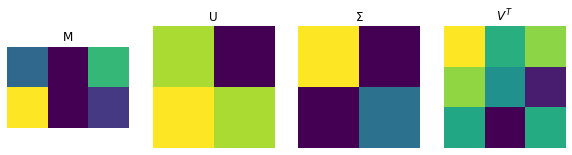

In [2]:
# rectangular matrix
M = [[3, 1, 5], [7, 1, 2]]

# SVD
U, S, V = np.linalg.svd(M)
# Note: 
#    1)  S is actually a vector, we will have to use diag() to convert it into a matrix
#    2)  V returned by the function is V'  


print("U:\n", U, "\n\n S:\n", S, "\n\nV:\n", V, "\n\n")

plt.figure(figsize=(10, 5))
plt.subplot(141)
plt.imshow(M)
plt.title('M')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()
print("\n\n")

---
## Eigendecomposition vs SVD for a square matrix

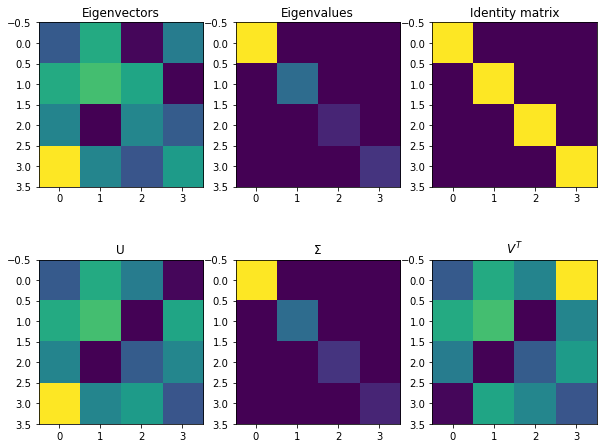




U - V:
 [[ 0.  0.  0.  0.]
 [ 0. -0. -0. -0.]
 [ 0.  0.  0. -0.]
 [-0.  0.  0.  0.]] 




In [3]:
# Creating a symmetric matrix
M = np.random.randn(4, 4)
M = M.T @ M

# eigendecomposition
L, W = np.linalg.eig(M)

# SVD
U, s, V = np.linalg.svd(M)


# images
fig, ax = plt.subplots(2, 3, figsize= (10, 8))
ax[0, 0].imshow(W)
ax[0, 0].set_title('Eigenvectors')

ax[0, 1].imshow(np.diag(L))
ax[0, 1].set_title('Eigenvalues')

ax[0, 2].imshow(np.eye(4))
ax[0, 2].set_title('Identity matrix')

ax[1, 0].imshow(U)
ax[1, 0].set_title('U')

ax[1, 1].imshow(np.diag(s))
ax[1, 1].set_title('$\Sigma$')

ax[1, 2].imshow(V)
ax[1, 2].set_title('$V^T$')
plt.show()
print("\n\n")


## For a symmetric matrix, U and V are the same, and U and W(sorted) are the same 

# Comparing U and V above 
print("U - V:\n", np.round(U - V.T, 6), "\n\n")

## Relation between singular values and eigenvalues

In [4]:
M = np.array([ [3, 1, 0], [1, 1, 0] ])

# case 1: eig(M'M) vs. svd(M)
print("Case 1:")
print(np.sort(np.linalg.eig(M.T @ M)[0]))            # sorted eigenvalues of M'M
print(np.sort(np.linalg.svd(M)[1])**2, "\n\n")       # (sorted singular values of M)^2

# case 2: eig(M'M) vs. svd(M'M)
print("Case 2:")
print(np.sort(np.linalg.eig(M.T @ M)[0]))            # sorted eigenvalues of M'M
print(np.sort(np.linalg.svd(M.T @ M)[1]), "\n\n")    # sorted singularvalues of M'M

# case 3a: eig(A) vs. svd(A), real-valued eigenvalues
print("Case 3a:")
# square matrix for eig
A = [ [3,1,0], [1,1,0], [1,1,1]]
print(np.sort(np.linalg.eig(A)[0]))                  
print(np.sort(np.linalg.svd(A)[1]), "\n\n")

# case 3b: eig(A) vs. svd(A), complex eigenvalues
print("Case 3b:")
A = np.random.randn(3, 3)                            # random matrices will likely give complex eigenvalues

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]), "\n\n")        

## Note: singular values are always real values, unlike the eigenvalues

Case 1:
[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425] 


Case 2:
[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425] 


Case 3a:
[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011] 


Case 3b:
[-1.64294007+0.j          1.62528581-0.57501488j  1.62528581+0.57501488j]
[1.03073905 1.88056432 2.51919774] 




---
## Spectral theory of matrices

##### Representing a matrix as a sum of simple (rank 1) matrices

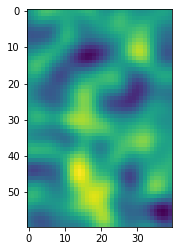

In [5]:
# matrix dimensions
m = 60
n = 40

# 2D Gaussian for smoothing
k = int((m + n)/4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
gaussian2d = np.exp(-(X**2 + Y**2)) / (k/8)

# matrix
M = scipy.signal.convolve2d(np.random.randn(m, n), gaussian2d, 'same')
plt.imshow(M)
plt.show()

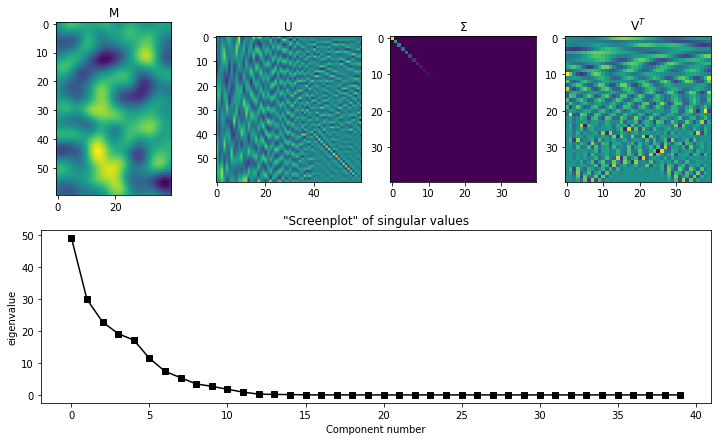

In [6]:
# SVD
U, S, V = np.linalg.svd(M)


# show the constituent matrices
fig = plt.subplots(1, figsize = (12, 7))

plt.subplot(241)
plt.imshow(M)
plt.title('M')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('eigenvalue')
plt.title('"Screenplot" of singular values')

plt.show()
print("\n\n")

## Not all components have a positive eigenvalue

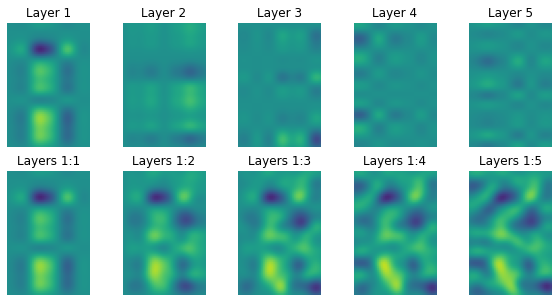

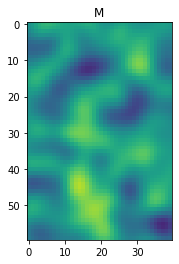

In [7]:
# assuming that 5 components have all the necessary information
n_comps = 5

rank1mats = np.zeros((n_comps, m, n))

plt.figure(figsize=(10, 5))
for i in range(0, n_comps):
    
    # create rank1 matrix
    rank1mats[i, :, :] = np.outer( U[:, i] * S[i], V[i, :] )
    
    plt.subplot2grid((2, 5),(0, i))
    plt.imshow(rank1mats[i, :, :], vmin = -5, vmax = 5)
    plt.axis('off')
    plt.title('Layer %d' %(i+1))
    
    plt.subplot2grid((2, 5), (1, i))
    imdat = np.sum(rank1mats[:i+1, :, :], axis = 0)
    plt.imshow(imdat, vmin = -5, vmax = 5)
    plt.axis('off')
    plt.title('Layers 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(M, vmin = -5, vmax = 5)
plt.title('M')
plt.show()
print("\n\n")

---
## SVD for low-rank approximations

###### What if we used some (not all) components/layers to get an approximate reconstruction of the matrix M
###### We will loose data and some information, but how much? Not a lot but definitely some!
###### It all depends on the number of layers, the orginal matrix, and whether we prefer loosing a lot of data for a small portion of extra information or not?
<br/>

###### If we used all the layers,
##### $M_{m\;x\; n} = U_{m\;x\;m}\;.\; \Sigma_{m\;x\;n}\;.\; V^T_{n\;x\;n}$
<br/>

###### However, if we used only the first k layers,
##### $M_{m\;x\; n} \approx U_{m\;x\;k}\;.\; \Sigma_{k\;x\;k}\;.\; V^T_{k\;x\;n}\;\;\;\;\;\;\;\;\;$ *(we are changing the rank of the matrix M)*
<br/>
<br/>


Rank of the original matrix M = 39
Rank of the reconstructed matrix M2 = 5




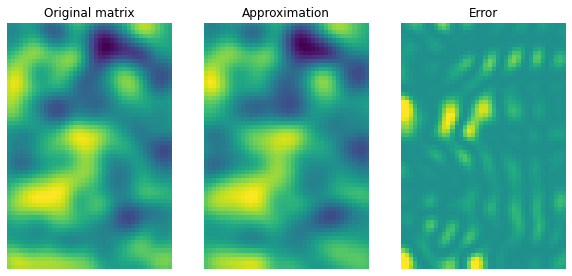

In [8]:
# matrix dimensions
m = 60
n = 40

# 2D Gaussian for smoothing
k = int((m + n)/4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
gaussian2d = np.exp(-(X**2 + Y**2)) / (k/8)

# matrix
M = scipy.signal.convolve2d(np.random.randn(m, n), gaussian2d, 'same')

# SVD
U, S, V = np.linalg.svd(M)


# number of components (singular "layers") to keep
n_comps = 5

# reduced matrices
U2 = U[ : , 0 : n_comps]     # m x n_comps
S2 = S[0 : n_comps]          # n_comps x n_comps
V2 = V[0 : n_comps, : ]      # n_comps x n

# low-rank apporoximation
M2 = U2 @ np.diag(S2) @ V2

# ranks 
print("Rank of the original matrix M = %d" %np.linalg.matrix_rank(M))
print("Rank of the reconstructed matrix M2 = %d\n\n" %np.linalg.matrix_rank(M2))  # same as n_comps


## Computing the error (lost information)
# error map and percent difference from original matrix
error_map = (M2 - M)**2

# plotting
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(M)
plt.axis('off')
plt.title('Original matrix')

plt.subplot(132)
plt.imshow(M2)
plt.axis('off')
plt.title('Approximation')

plt.subplot(133)
plt.imshow(error_map, vmin = -1, vmax = 1)
plt.axis('off')
plt.title('Error')
plt.show()
print("\n\n")

---
## Converting singular values to percent variance

##### Variance of a matrix = Sum of all the singular values of the matrix

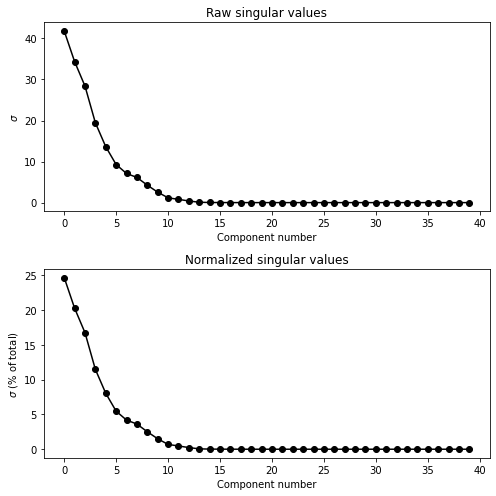

In [9]:
# matrix dimensions
m = 60
n = 40

# 2D Gaussian for smoothing
k = int((m + n)/4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
gaussian2d = np.exp(-(X**2 + Y**2)) / (k/8)

# matrix
M = scipy.signal.convolve2d(np.random.randn(m, n), gaussian2d, 'same')

# SVD 
U,s,V = np.linalg.svd(M)

# normalising the singular values
s_pct = 100 * s / np.sum(s)

# plotting the singular values for comparison
fig = plt.subplots(1, figsize=(7, 7))

plt.subplot(211)
plt.plot(s,'ko-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(s_pct,'ko-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Normalized singular values')

plt.tight_layout()
plt.show()
print("\n\n")

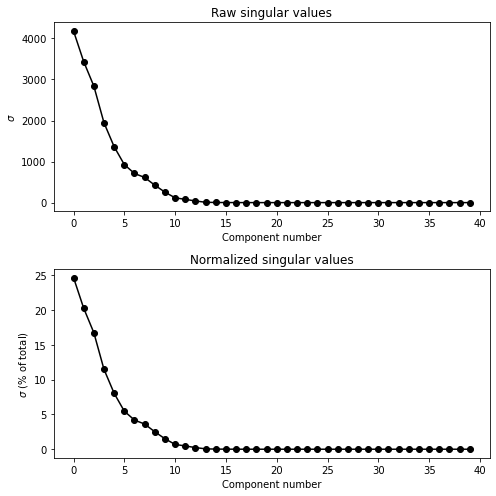

In [10]:
## Q: What if we scaled the matrix M?
## A: The magnitude of each singular value will change, however, the Normalized singular values won't change!

M_scaled = M * 100

# SVD 
U,s,V = np.linalg.svd(M_scaled)

# normalising the singular values
s_pct = 100 * s / np.sum(s)

# plotting the singular values for comparison
fig = plt.subplots(1, figsize=(7, 7))

plt.subplot(211)
plt.plot(s,'ko-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(s_pct,'ko-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Normalized singular values')

plt.tight_layout()
plt.show()
print("\n\n")

---
## SVD, matrix inverse, and Moore-Penrose pseudoinverse

##### Inverse:
######      $\;\;M = U.\Sigma.V^T$
###### => $\;\;M^{-1} = (U.\Sigma.V^T)^{-1}$
###### => $\;\;M^{-1} = V^{-T}.\Sigma^{-1}.U^{-1}$
###### => $\;\;M^{-1} = V.\Sigma^{-1}.U^{T}\;\;\;\;\;\;\;\;\;\;\;$ ($V^{-T} = V\;\;\;$ & $\;\;\;U^{-1} = U^T\;$ since U and V are orthogonal matrices)
<br/>

##### Pseudo-inverse:
######      $\;\;M = U.\Sigma.V^T$
###### => $\;\;M^{*} = (U.\Sigma.V^T)^{*}$
###### => $\;\;M^{*} = V^{-T}.\Sigma^{*}.U^{*}$
###### => $\;\;M^{*} = V.\Sigma^{*}.U^{T}\;\;\;\;\;\;\;\;\;\;\;$ ($V^{-T} = V\;\;\;$ & $\;\;\;U^{-1} = U^T\;$ since U and V are orthogonal matrices)

In [11]:
# a singular matrix (first two rows are the same)
M = [ [1,2,3],
      [1,2,4], 
      [1,2,5]  ]
  
# SVD
U, S, V = np.linalg.svd(M)

# pseudoinvert S
nonzero_elements = S > 10**(-14)            # Due to rounding errors, we use S = 0, if S < 10^{-14}
S[nonzero_elements] = 1 / S[nonzero_elements]     # inverting only those elements as 1/0 will give an error

# now pseudoinvert A
Mi = V.T @ np.diag(S) @ U.T

print(np.round(Mi @ M, 4), "\n\n")          # must be close to an identity matrix

# computing pseudoinverse using the pinv()
print(np.round(np.linalg.pinv(M) @ M, 4), "\n\n")

[[ 0.2  0.4  0. ]
 [ 0.4  0.8 -0. ]
 [-0.  -0.   1. ]] 


[[ 0.2  0.4  0. ]
 [ 0.4  0.8 -0. ]
 [-0.  -0.   1. ]] 




---
## Condition number of a matrix
#####
##### Condition number$\;(K ) = \sigma_{max}\;/\; \sigma_{min}\;\;\;$ (indicates the spread of the information in the matrix)
<br>

##### &ndash;  When a matrix has a large condition number, it is called ***ill-conditioned***
##### &ndash;  When a matrix has a small condition number, it is called ***well-conditioned***
<br>

Smallest Singular Value: 44.54020213137379 
Largest Singular Value:	 3.814516787599903e-12 

Condition number (Method 1): 11676499177081.49
Condition number (Method 2): 11676499177081.502 




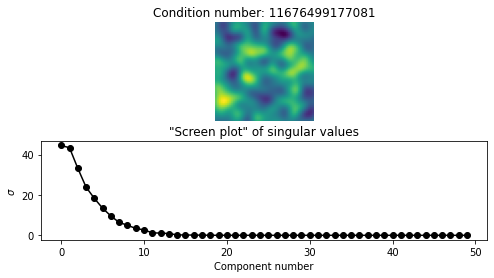

In [12]:
# matrix sizes
m = 50

# 2D Gaussian for smoothing
k = int((m + n)/4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
gaussian2d = np.exp(-(X**2 + Y**2)) / (k/8)

# matrix
M = np.random.randn(m, m)
M = scipy.signal.convolve2d(M, gaussian2d, 'same')

# SVD
S = np.linalg.svd(M)[1]


# Method 1: computing condition number (the python program sorts the singular values, i.e. the S vector is sorted)
c_num = S[0] / S[-1]       
print("Smallest Singular Value:", S[0], "\nLargest Singular Value:\t", S[-1], "\n\nCondition number (Method 1):", c_num)

# Method 2: cond()
c_num2 = np.linalg.cond(M)
print("Condition number (Method 2):", c_num2, "\n\n")


# show the matrix
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(M)
plt.axis('off')
plt.title('Condition number: %d' %c_num)

plt.subplot(212)
plt.plot(S,'ko-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Screen plot" of singular values')

plt.show()
print("\n\n")

### Creating a matrix with a desired condition number

49.99999999999997 




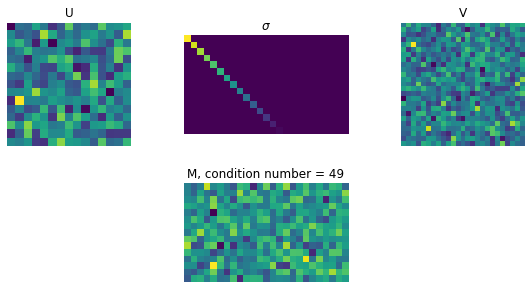

In [13]:
# matrix dimensions 
m = 15
n = 25
c_num = 50

# creating a singular vectors 
## The U and V matrices in SVD are orthogonal matrices, 
## we can create othogonal matrices of the desired size from the QR decmposition of the random matrices
U, R1 = np.linalg.qr(np.random.randn(m, m)) 
V, R1 = np.linalg.qr(np.random.randn(n, n))

s = np.linspace(c_num, 1, np.min([m, n]))   # min and max singular values are set to 1 and c_num, respectively
S = np.zeros((m, n))
for i in range(len(s)):
    S[i, i] = s[i]

# creating the matrix using reverse SVD with the new singular values
M = U @ S @ V.T
c_num2 = np.linalg.cond(M)
print(c_num2, "\n\n")


# plotting
fig = plt.subplots(1, figsize= (10, 5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(232)
plt.imshow(S)
plt.title('$\sigma$')
plt.axis('off')

plt.subplot(233)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(235)
plt.imshow(M)
plt.title('M, condition number = %d' %c_num2)
plt.axis('off')

plt.show()
print("\n\n")